 o	Implement the main steps of a Shallow Neural Network
 <ul><li>Understand the dataset</li>
    <li>Implement your first Forward and Backward propagation</li>
    <li>Implement activation function, gradient descent</li>
    <li>Build Neural Network Model</li>
 	<li>Test and optimize the model</li>
    <li> Make Predictions</li><ul>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

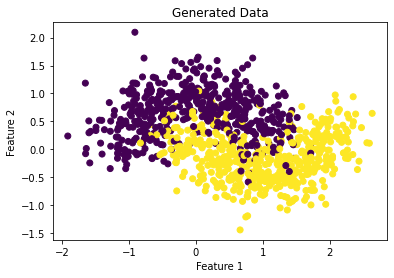

(800, 2) (200, 2) (800, 1) (200, 1)


In [86]:
def gen_data(n=1000, noise=.3,t_size=.2):
    data=datasets.make_moons(n,noise=noise,random_state=1)
    
    X=data[0]
    y=data[1].reshape(-1,1)
    
    plt.scatter(X.T[0],X.T[1],c=y.T)
    plt.title('Generated Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    return train_test_split(X,y,test_size=t_size,random_state=1)
    
X_train,X_test,y_train,y_test=gen_data(1000,.3,.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [94]:
class ShallowNN:
    def __init__(self,n_features,n_neurons,n_output):
        np.random.seed(1)
        self.w1=np.random.randn(n_features,n_neurons)
        
        np.random.seed(2)
        self.w2=np.random.randn(n_neurons,n_output)
        
        self.lr=0.01
        
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def d_sigmoid(self,x):
        return x*(1-x)
    
    def calc_loss(self,y_hat,y):
        return ((y-y_hat)**2).mean()
    
    def plot_loss(self,loss):
        plt.plot(loss.keys(),loss.values())
        plt.title("Training Loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()
        
    def feedforward(self,X):
        self.layer1=self.sigmoid(X @ self.w1)
        self.output=self.sigmoid(self.layer1 @ self.w2)
        
    def backpropogation(self,X,y):
        d2=self.output-y
        d1=(self.w2@d2.T).T*self.d_sigmoid(self.layer1)
        
        w1_d=X.T@d1
        w2_d=self.layer1.T@d2
        
        self.w1 -= self.lr*w1_d
        self.w2 -= self.lr*w2_d
        
    def fit(self,X,y,epochs=1,lr=0.01):
        self.lr=lr
        
        loss_dict={}
        
        for i in range(epochs):
            np.random.seed(1)
            self.feedforward(X)
            self.backpropogation(X,y)
            
            loss=self.calc_loss(self.output,y)
            loss_dict[i]=loss
            
            if (i+1)%100==0:
                print(f'Epoch:{i+1}|Loss:{round(loss,3)}')
                
                
        self.plot_loss(loss_dict)
            
    def predict(self,X):
        self.feedforward(X)
        return self.output

        

        

Epoch:100|Loss:0.155
Epoch:200|Loss:0.138
Epoch:300|Loss:0.129
Epoch:400|Loss:0.124
Epoch:500|Loss:0.121
Epoch:600|Loss:0.119
Epoch:700|Loss:0.117
Epoch:800|Loss:0.117
Epoch:900|Loss:0.116
Epoch:1000|Loss:0.116


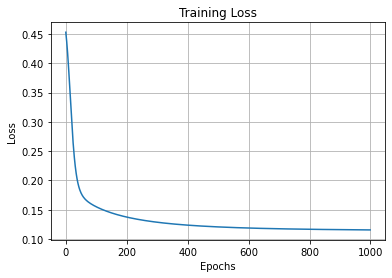

In [95]:
snn= ShallowNN(2,10,1)
snn.fit(X_train,y_train,epochs=1000,lr=0.0001)

In [98]:
predict=snn.predict(X_test)
predict.T

array([[0.97495699, 0.91108268, 0.93451237, 0.03748296, 0.09510269,
        0.02501803, 0.04313945, 0.19537472, 0.03976311, 0.79129621,
        0.39605599, 0.83353315, 0.59680771, 0.1952046 , 0.96515339,
        0.84878268, 0.13827917, 0.07051843, 0.34117074, 0.93934043,
        0.86552827, 0.93027887, 0.84226097, 0.43187402, 0.24179468,
        0.95258962, 0.2749743 , 0.49277756, 0.03206614, 0.94748526,
        0.169225  , 0.96120038, 0.31948258, 0.05609915, 0.04567123,
        0.90154897, 0.03801968, 0.8983543 , 0.64747117, 0.47091512,
        0.76562862, 0.07992643, 0.69325152, 0.82563162, 0.15432264,
        0.32888905, 0.97736568, 0.81619187, 0.84375688, 0.98789597,
        0.72885232, 0.22944164, 0.92709267, 0.09035986, 0.09559854,
        0.94524484, 0.01830699, 0.24048199, 0.23970862, 0.20530018,
        0.15789739, 0.05426859, 0.12325837, 0.9694443 , 0.49126491,
        0.38009275, 0.62562345, 0.9785748 , 0.90005233, 0.73709276,
        0.13116792, 0.7830694 , 0.49690468, 0.30